<a href="https://colab.research.google.com/github/Robotmcgregor/earth-analytics-python-env/blob/master/Classify_and_Plot_Raster_Data_in_Python_NF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classify and Plot Raster Data in Python

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/classify-plot-raster-data-in-python/

In [1]:
pip install rasterio

     |████████████████████████████████| 18.2MB 1.4MB/s 


In [2]:
pip install earthpy

     |████████████████████████████████| 1.4MB 2.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 972kB 17.2MB/s 
     |████████████████████████████████| 14.7MB 322kB/s 
     |████████████████████████████████| 10.9MB 44.8MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365087 sha256=17467bdf1b6e232bb7b2591de346f5f5d554fdc8e334e62442c3c90066b99805
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [3]:
pip install seaborn

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep

In [6]:
import seaborn as sns
sns.set(font_scale=1.5, style='whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
dtm_path=("/content/drive/My Drive/earth-analytics/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif")

In [10]:
dsm_path=("/content/drive/My Drive/earth-analytics/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif")

In [11]:
with rio.open(dtm_path) as src:
  lidar_dtm_im = src.read(1, masked=True)
  spatial_extent_dtm = plotting_extent(src)

In [12]:
with rio.open(dsm_path) as src:
  lidar_dsm_im =src.read(1, masked=True)
  spatial_extent_dsm = plotting_extent(src)


In [14]:
#Check the spatial extents match
spatial_extent_dsm==spatial_extent_dtm

True

In [16]:
#Create a conopy height model (CHM)
lidar_chm_im = lidar_dsm_im - lidar_dtm_im
lidar_chm_im

masked_array(
  data=[[--, --, --, ..., 0.0, 0.1700439453125, 0.9600830078125],
        [--, --, --, ..., 0.0, 0.090087890625, 1.6400146484375],
        [--, --, --, ..., 0.0, 0.0, 0.0799560546875],
        ...,
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.402823e+38,
  dtype=float32)

#Classify into three classes: short, meduium and tall trees


In [17]:
print("Min values: ", lidar_chm_im.min())
print("Max values: ", lidar_chm_im.max())

Min values:  0.0
Max values:  26.930054


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe594c9b70>)

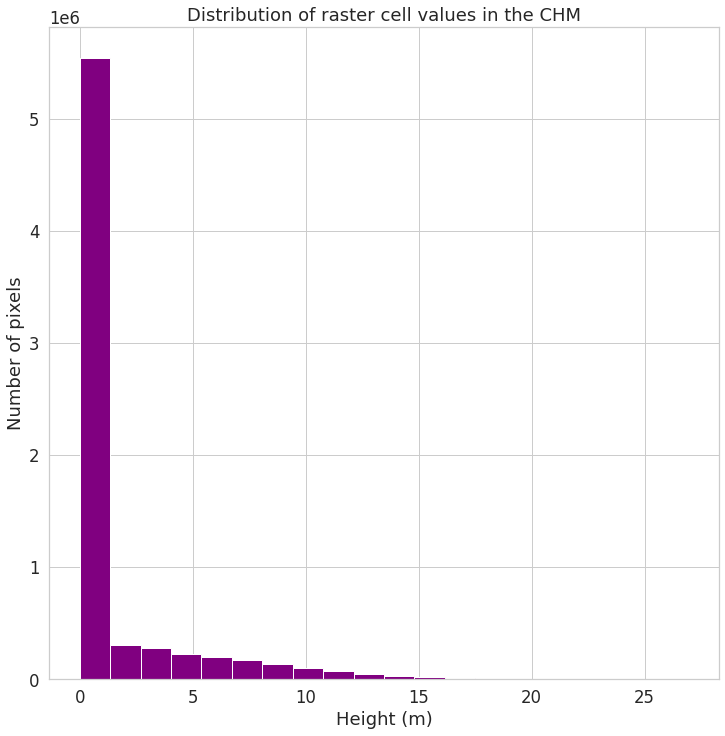

In [18]:
#view data with a histogram
ep.hist(lidar_chm_im.ravel(),
        title="Distribution of raster cell values in the CHM",
        xlabel="Height (m)",
        ylabel= "Number of pixels")

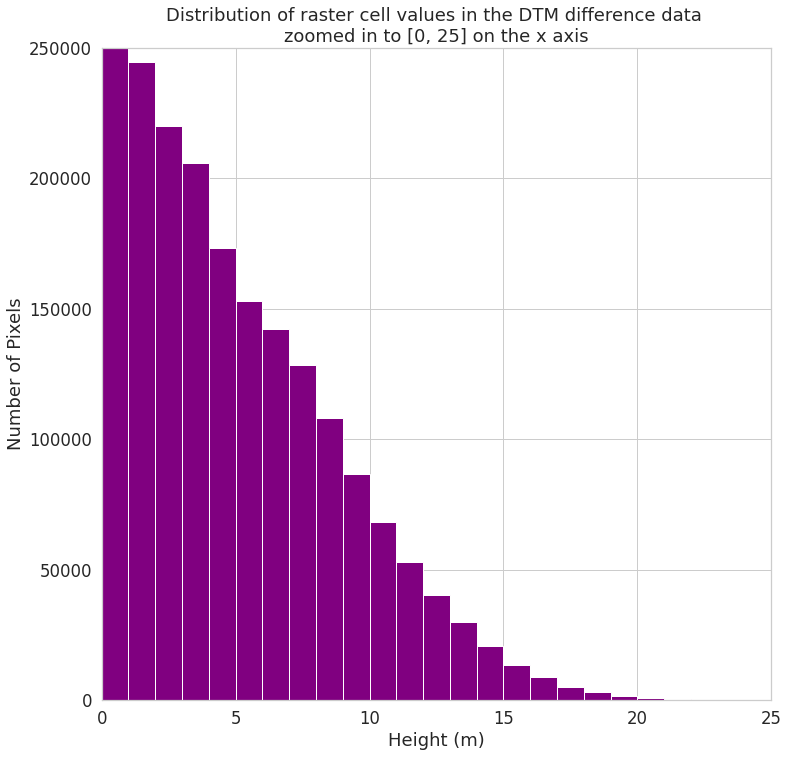

In [21]:
#constrain the histogram using x and y limits
xlim=[0,25]

fig, ax = ep.hist(lidar_chm_im.ravel(),
                  hist_range=xlim,
                  bins=range(*xlim),
                  ylabel="Number of Pixels", xlabel="Height (m)",
                  title= "Distribution of raster cell values in the DTM difference data \n" + "zoomed in to {} on the x axis".format(xlim))
ax.set(xlim=xlim, ylim=[0,250000])
plt.show()

In [23]:
#get values from the histogram
counts, bins = np.histogram(lidar_chm_im,
                            bins=50, range=xlim)
print("Counts: ", counts)
print("Bins: ", bins)

Counts:  [5292785  155317  128037  116551  109743  110395  107528   98579   89234
   83947   79123   73934   71669   70521   67043   61639   56389   51932
   46193   40674   36442   31877   28428   24553   21620   18613   16095
   13776   11424    9402    7504    6195    4883    3901    2954    2306
    1776    1342    1027     706     525     358     271     160     113
      99      47      44      21      16]
Bins:  [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25. ]


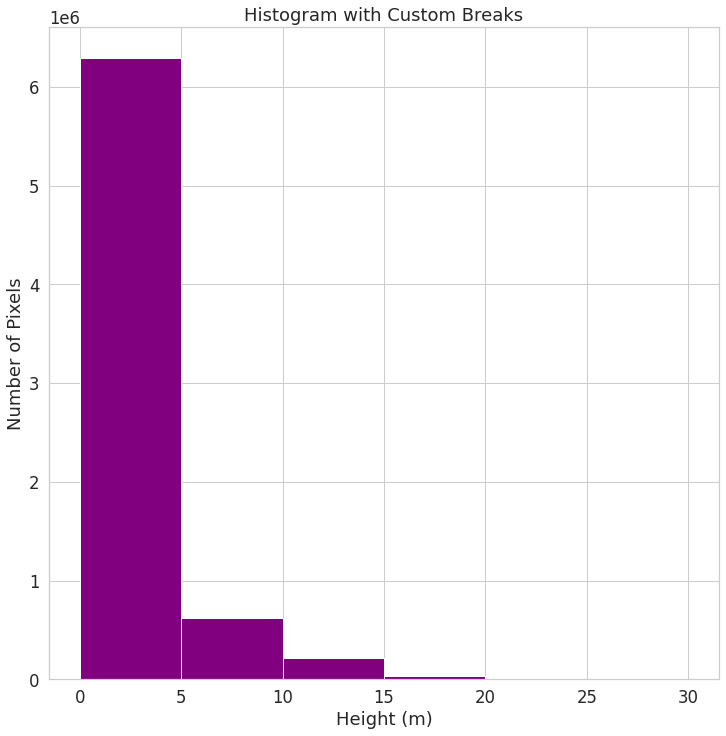

In [24]:
#Create breaks (bins)
# Histogram with custom breaks
ep.hist(lidar_chm_im.ravel(),
        bins=[0, 5, 10, 15, 20, 30],
        title="Histogram with Custom Breaks",
        xlabel="Height (m)", 
        ylabel="Number of Pixels")

plt.show()

In the case of this lidar instrument, you know that values between 0 and 2 meters are not reliable (you know this if you read the documentation about the NEON sensor and how these data were processed).



*   0 - 2 = no trees
*   2 - 7 = short trees


*   7 - 12 = medium trees
*   greater than 12 = tall trees


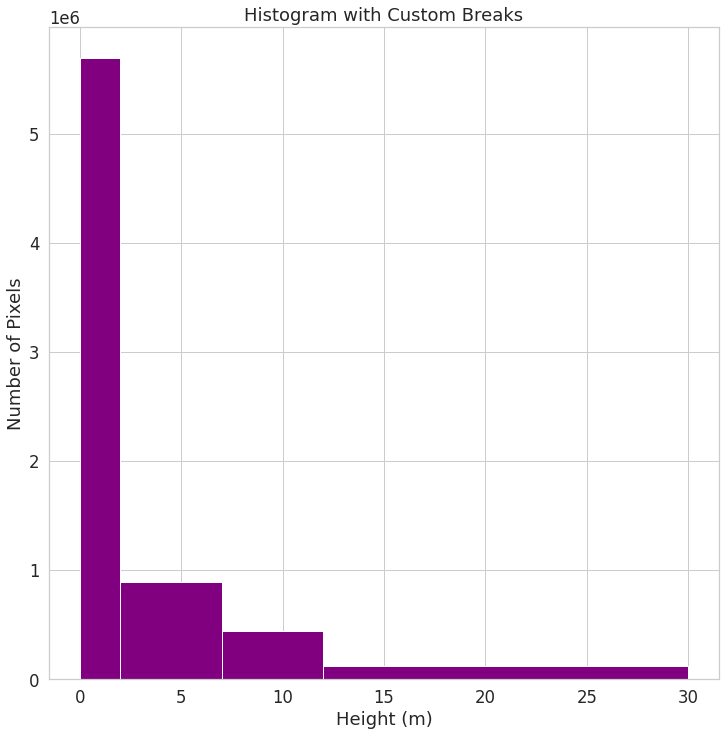

In [26]:
ep.hist(lidar_chm_im.ravel(),
        colors='purple',
        bins=[0, 2, 7, 12, 30],
        title="Histogram with Custom Breaks",
        xlabel="Height (m)",
        ylabel="Number of Pixels")

plt.show()